training and testing a CNN based classifier using images captured by you and your group mates using mobile phones. Mention in your report training time, testing time, amount-of-data vs performance, epoch vs performance, your model size (i.e., number of parameters) vs performance and some other observations that you think interesting and informative.


In [2]:


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import time
import os

# PARAMETERS
IMG_SIZE = (128, 128)
BATCH_SIZE = 8
EPOCHS = 5

# Path to your dataset (change this)
DATA_DIR = '/home/mylove/4.1/AI lab /checked'

def dataset_loaders(data_dir):
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    train_gen = datagen.flow_from_directory(
        data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_gen = datagen.flow_from_directory(
        data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_gen, val_gen

train_data, val_data = dataset_loaders(DATA_DIR)
class_names = list(train_data.class_indices.keys())
print("Detected Classes:", class_names)


Found 814 images belonging to 2 classes.
Found 203 images belonging to 2 classes.
Detected Classes: ['resized_images-sheuli', 'resized_images_togor']


In [3]:
# -----------------------------
# MODEL BUILDING
def build_model():
    inputs = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_model()
model.summary()


E0000 00:00:1761016399.867089   42655 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761016399.867938   42655 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# -----------------------------
# MODEL COMPILATION
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# TRAINING
train_start = time.time()
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)
train_end = time.time()

print(f"Training Time: {train_end - train_start:.2f} seconds")


Epoch 1/5


/home/mylove/4.1/AI lab /venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step - accuracy: 0.9079 - loss: 0.3424 - val_accuracy: 0.9951 - val_loss: 0.0384
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.9951 - val_loss: 0.0142
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 1.0000 - loss: 3.3649e-04 - val_accuracy: 1.0000 - val_loss: 3.9536e-04
Training Time: 91.74 seconds


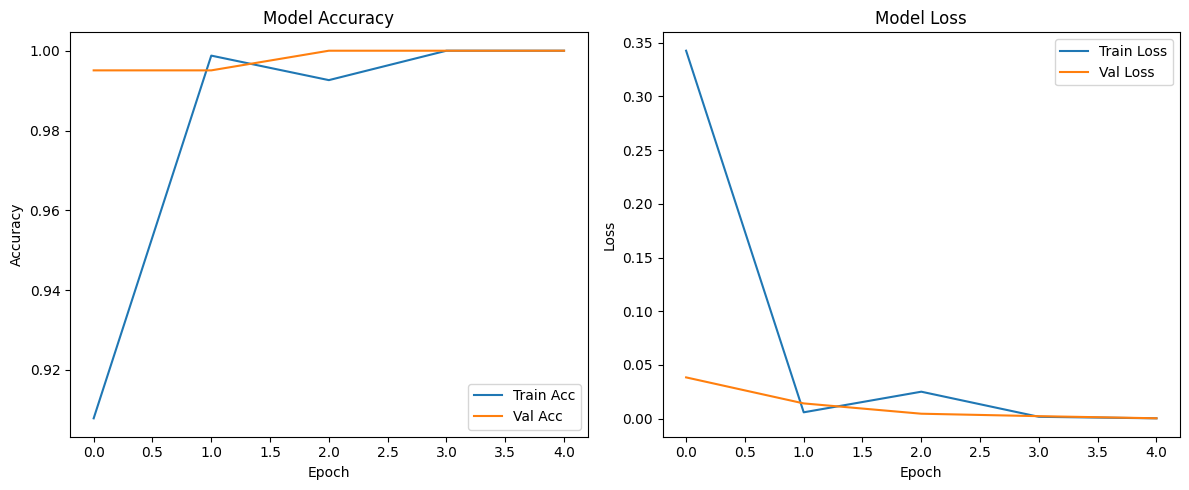

In [7]:
# -----------------------------
# TRAINING CURVES (Accuracy & Loss)
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# -----------------------------
# EVALUATION

eval_start = time.time()
loss, accuracy = model.evaluate(val_data)
eval_end = time.time()

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")
print(f"Evaluation Time: {eval_end - eval_start:.2f} seconds")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 3.9536e-04
Test Accuracy: 1.0000
Test Loss: 0.0004
Evaluation Time: 0.56 seconds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


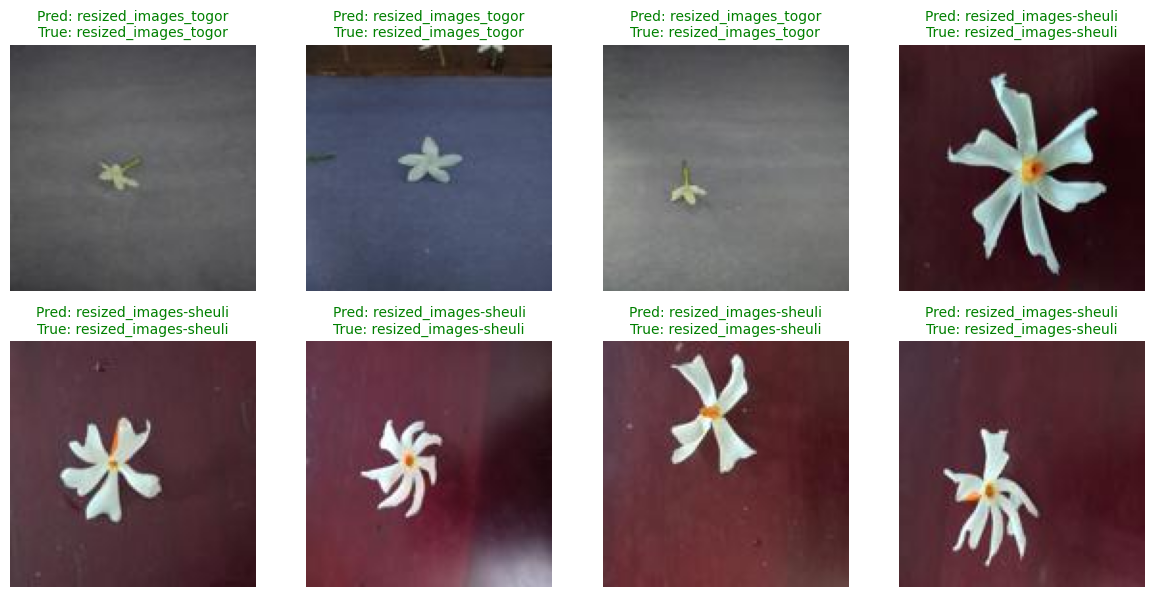

In [12]:

# PREDICTION VISUALIZATION

def plot_predictions_grid(model, val_gen, class_names, num_images=16):
    images, labels = next(val_gen)
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(min(num_images, len(images))):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        pred_label = class_names[pred_classes[i]]
        true_label = class_names[true_classes[i]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10, color=color)
    plt.tight_layout()
    plt.show()

plot_predictions_grid(model, val_data, class_names)
